In [1]:
from protosc.simulation import create_simulation_data, compare_results, create_categorical_data
from protosc.model.genetic import GeneticModel, genetic_algorithm, compute_coefs
from protosc.model.utils import train_kfold_validate
import numpy as np

from matplotlib import pyplot as plt

In [2]:
n_features = 300
n_random_features = 200
mutation_rate = 0.1

In [3]:
X, y, truth = create_simulation_data(n_features=n_features, n_true_features=50)

In [4]:
acc_max = [train_kfold_validate(X, y, truth["selected_features"]) for _ in range(10)]
acc_all = [train_kfold_validate(X, y, np.arange(X.shape[1])) for _ in range(10)]
print(np.mean(acc_max), np.std(acc_max))
print(np.mean(acc_all), np.std(acc_all))

0.8950615763546796 0.0052363208786717855
0.8346921752417442 0.0060545695967153725


In [5]:
gen = GeneticModel(n_random_features=n_random_features, mutation_rate=mutation_rate)

In [6]:
features = gen.execute(X, y)
n_correct = len(set(features).intersection(set(truth["selected_features"])))
print(n_correct, len(features))

In [7]:
X, y, cat_truth = create_categorical_data(n_features=n_features, n_true_features=50, n_categories=3)

In [8]:
cat_features = gen.execute(X, y)

Acc: 0.48 (max: 0.53, #f: 14): 100%|██████████| 15/15 [00:35<00:00,  2.35s/it]

90 120 75 0.0002
90 120 107 0.0001


In [9]:
n_correct = len(set(cat_features).intersection(set(cat_truth["selected_features"])))
print(n_correct, len(cat_features))

6 6


In [10]:
X_gen, y_gen = genetic_algorithm(X, y)

Acc: 0.50 (max: 0.56, #f: 25): 100%|██████████| 12/12 [00:42<00:00,  3.56s/it]


In [11]:
coefs = compute_coefs(X_gen, y_gen, n_random_features)

90 120 91 0.0002


(array([ 12.63107625,  25.26215249,  37.89322874, 151.57291494,
         18.94661437,  18.94661437,  12.63107625,  12.63107625,
         12.63107625,  12.63107625]),
 array([-0.00995786, -0.00679107, -0.00362428, -0.00045749,  0.00270931,
         0.0058761 ,  0.00904289,  0.01220969,  0.01537648,  0.01854327,
         0.02171006]),
 <BarContainer object of 10 artists>)

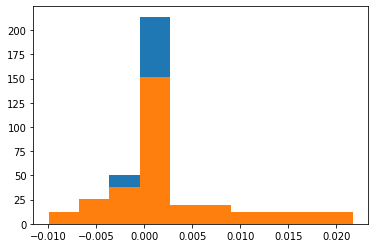

In [12]:
plt.hist(coefs, density=True)
plt.hist(coefs[cat_truth["selected_features"]], density=True)

In [13]:
counts = X_gen.sum(axis=0)
sel = cat_truth["selected_features"]

In [14]:
np.mean(counts), np.mean(counts[cat_truth["selected_features"]])

(103.34, 179.24)

In [15]:
np.mean(coefs), np.mean(coefs[sel])

(1.046385477180032e-05, 0.0022911170200806473)

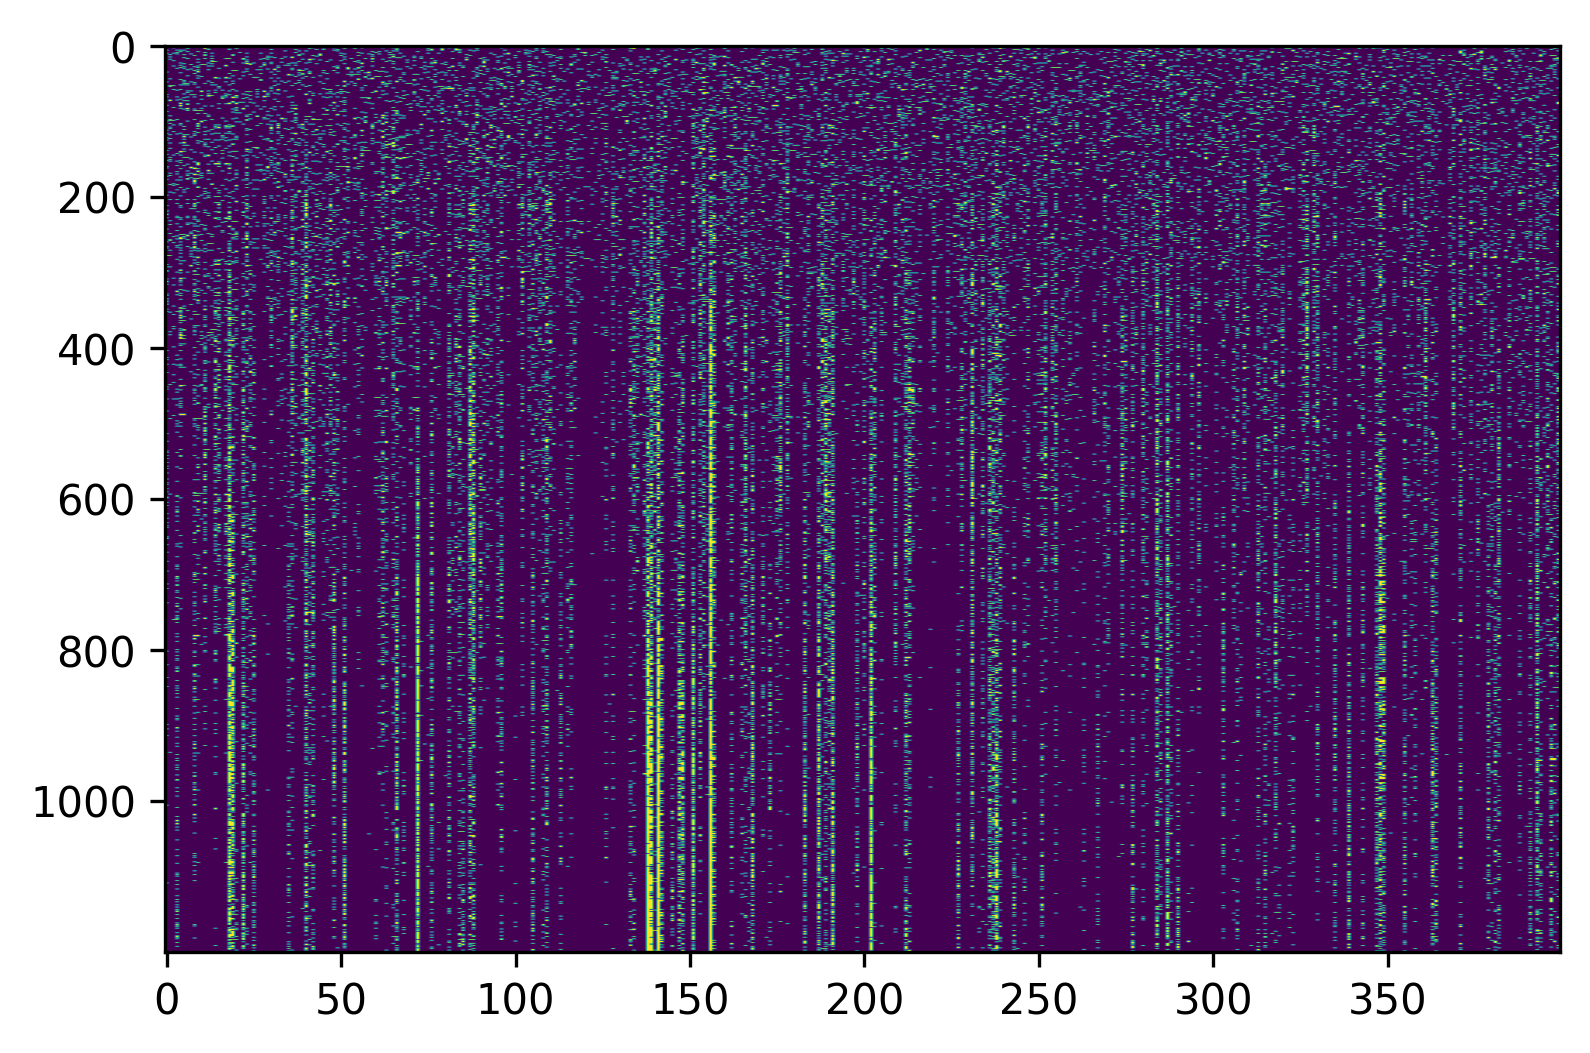

In [16]:
plt.figure(dpi=300)
plt.imshow(X_gen, aspect="auto")